In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [8]:
df.reset_index(drop=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df_corr_mat = df.corr()
px.imshow(df_corr_mat)


In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [13]:
list(y)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(241, 13)
(61, 13)


In [16]:
print(y_train.shape)
print(y_test.shape)

(241,)
(61,)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
def get_models(verbose: bool = False) -> list:
  directory = os.path.join('.', 'models')
  models = []

  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if f.endswith('test.h5'):
      continue

    if f.endswith('.h5'):
      if(verbose):
        print(f'loading {f}')
      models.append(tf.keras.models.load_model(f))

  return models


In [19]:
all_models = get_models(verbose=True)

loading .\models\0_dense16_dense16_dense16.h5
loading .\models\1000_dense64_dense240_dense144.h5
loading .\models\1001_dense64_dense240_dense160.h5
loading .\models\1002_dense64_dense240_dense176.h5
loading .\models\1003_dense64_dense240_dense192.h5
loading .\models\1004_dense64_dense240_dense208.h5
loading .\models\1005_dense64_dense240_dense224.h5
loading .\models\1006_dense64_dense240_dense240.h5
loading .\models\1007_dense64_dense240_dense256.h5
loading .\models\1008_dense64_dense256_dense16.h5
loading .\models\1009_dense64_dense256_dense32.h5
loading .\models\100_dense16_dense112_dense80.h5
loading .\models\1010_dense64_dense256_dense48.h5
loading .\models\1011_dense64_dense256_dense64.h5
loading .\models\1012_dense64_dense256_dense80.h5
loading .\models\1013_dense64_dense256_dense96.h5
loading .\models\1014_dense64_dense256_dense112.h5
loading .\models\1015_dense64_dense256_dense128.h5
loading .\models\1016_dense64_dense256_dense144.h5
loading .\models\1017_dense64_dense256_dense

In [20]:
print(all_models)

[<keras.engine.sequential.Sequential object at 0x000001A46FDC9AF0>, <keras.engine.sequential.Sequential object at 0x000001A46FBCA0A0>, <keras.engine.sequential.Sequential object at 0x000001A4726B7F10>, <keras.engine.sequential.Sequential object at 0x000001A4736FEFD0>, <keras.engine.sequential.Sequential object at 0x000001A46FE25D00>, <keras.engine.sequential.Sequential object at 0x000001A4736FE190>, <keras.engine.sequential.Sequential object at 0x000001A473714EE0>, <keras.engine.sequential.Sequential object at 0x000001A4737EF040>, <keras.engine.sequential.Sequential object at 0x000001A4737E5EE0>, <keras.engine.sequential.Sequential object at 0x000001A47381AD90>, <keras.engine.sequential.Sequential object at 0x000001A473852CA0>, <keras.engine.sequential.Sequential object at 0x000001A47389ADF0>, <keras.engine.sequential.Sequential object at 0x000001A4737630D0>, <keras.engine.sequential.Sequential object at 0x000001A473936E20>, <keras.engine.sequential.Sequential object at 0x000001A47399E

In [21]:
def optimize(models: list,
            X_test: np.array,
            y_test: np.array,
            epochs: int = 50,
            verbose: int = 0) -> pd.DataFrame:
  
  results = []
  
  def test(model: tf.keras.Sequential) -> dict:
    # model.compile(
    #   loss=tf.keras.losses.binary_crossentropy,
    #   optimizer=tf.keras.optimizers.Adam(),
    #   metrics=[
    #     tf.keras.metrics.BinaryAccuracy(name='accuracy')
    #   ]
    # )
    
    preds = model.predict(X_test)
    prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
    
    # Return evaluation metrics on the test set
    return {
      'model_name': model.name,
      'test_accuracy': accuracy_score(y_test, prediction_classes),
      'test_precision': precision_score(y_test, prediction_classes),
      'test_recall': recall_score(y_test, prediction_classes),
      'test_f1': f1_score(y_test, prediction_classes)
    }
  
  # Train every model and save results
  index = 0
  for model in models:
    try:
      print(model.name, end=' ... ')

      res = test(model=model)
      results.append(res)
    except Exception as e:
      print(f'{model.name} --> {str(e)}')
    index += 1
      
  return pd.DataFrame(results)

In [22]:
optimization_results = optimize(
    models=all_models,
    X_test=X_test_scaled,
    y_test=y_test
)

2/2 [==============================] - 0s 2ms/step
dense64_dense240_dense192 ... WARNING:tensorflow:5 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001A4FEEE81F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 [==============================] - 0s 1ms/step
dense64_dense240_dense208 ... WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001A4FEEE89D0> 

In [23]:
type(optimization_results)

pandas.core.frame.DataFrame

In [24]:
optimization_results.sort_values(by='test_precision', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1
3972,dense16_dense96_dense144,0.885246,0.962963,0.81250,0.881356
1010,dense16_dense192_dense240,0.868852,0.961538,0.78125,0.862069
3105,dense240_dense224_dense80,0.868852,0.961538,0.78125,0.862069
2548,dense208_dense224_dense240,0.868852,0.961538,0.78125,0.862069
3650,dense16_dense64_dense192,0.852459,0.960000,0.75000,0.842105
...,...,...,...,...,...
2220,dense32_dense48_dense192,0.803279,0.812500,0.81250,0.812500
306,dense80_dense256_dense208,0.803279,0.812500,0.81250,0.812500
1610,dense16_dense256_dense80,0.786885,0.806452,0.78125,0.793651
1199,dense16_dense208_dense256,0.786885,0.806452,0.78125,0.793651


In [25]:
optimization_results_precision = optimization_results.sort_values(by='test_precision', ascending=False)
optimization_results_precision = optimization_results_precision.reset_index()
optimization_results_precision

,index,model_name,test_accuracy,test_precision,test_recall,test_f1
0,3972,dense16_dense96_dense144,0.885246,0.962963,0.81250,0.881356
1,1010,dense16_dense192_dense240,0.868852,0.961538,0.78125,0.862069
2,3105,dense240_dense224_dense80,0.868852,0.961538,0.78125,0.862069
3,2548,dense208_dense224_dense240,0.868852,0.961538,0.78125,0.862069
4,3650,dense16_dense64_dense192,0.852459,0.960000,0.75000,0.842105
...,...,...,...,...,...,...
4091,2220,dense32_dense48_dense192,0.803279,0.812500,0.81250,0.812500
4092,306,dense80_dense256_dense208,0.803279,0.812500,0.81250,0.812500
4093,1610,dense16_dense256_dense80,0.786885,0.806452,0.78125,0.793651
4094,1199,dense16_dense208_dense256,0.786885,0.806452,0.78125,0.793651


In [26]:
optimization_results_recall = optimization_results.sort_values(by='test_recall', ascending=False)
optimization_results_recall = optimization_results_recall.reset_index()
optimization_results_recall

,index,model_name,test_accuracy,test_precision,test_recall,test_f1
0,3984,dense16_dense16_dense144,0.901639,0.906250,0.90625,0.906250
1,1672,dense160_dense208_dense160,0.885246,0.878788,0.90625,0.892308
2,3399,dense32_dense160_dense96,0.868852,0.875000,0.87500,0.875000
3,3772,dense48_dense208_dense96,0.885246,0.903226,0.87500,0.888889
4,1144,dense16_dense208_dense176,0.885246,0.903226,0.87500,0.888889
...,...,...,...,...,...,...
4091,1566,dense16_dense256_dense16,0.803279,0.884615,0.71875,0.793103
4092,3853,dense64_dense16_dense240,0.803279,0.884615,0.71875,0.793103
4093,3795,dense16_dense80_dense144,0.836066,0.958333,0.71875,0.821429
4094,244,dense16_dense128_dense160,0.819672,0.920000,0.71875,0.807018


In [27]:
optimization_results_accuracy = optimization_results.sort_values(by='test_accuracy', ascending=False)
optimization_results_accuracy = optimization_results_accuracy.reset_index()
optimization_results_accuracy

,index,model_name,test_accuracy,test_precision,test_recall,test_f1
0,2109,dense32_dense48_dense32,0.901639,0.933333,0.87500,0.903226
1,1777,dense16_dense32_dense160,0.901639,0.933333,0.87500,0.903226
2,3479,dense32_dense192_dense224,0.901639,0.933333,0.87500,0.903226
3,399,dense16_dense144_dense128,0.901639,0.933333,0.87500,0.903226
4,3984,dense16_dense16_dense144,0.901639,0.906250,0.90625,0.906250
...,...,...,...,...,...,...
4091,788,dense16_dense176_dense176,0.786885,0.851852,0.71875,0.779661
4092,3736,dense48_dense176_dense96,0.786885,0.827586,0.75000,0.786885
4093,3744,dense48_dense176_dense208,0.786885,0.806452,0.78125,0.793651
4094,3444,dense32_dense160_dense224,0.786885,0.827586,0.75000,0.786885


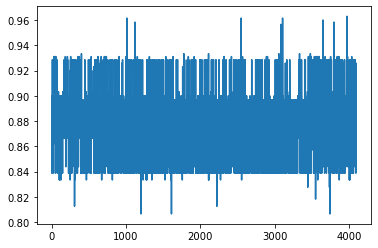

In [28]:
plt.plot(optimization_results['test_precision'][:])
plt.show()

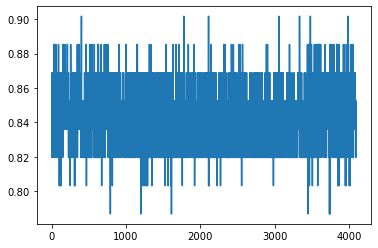

In [29]:
plt.plot(optimization_results['test_accuracy'][:])
plt.show()

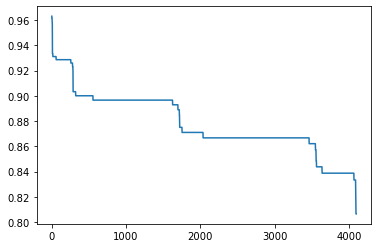

(4096,)


In [30]:
plt.plot(optimization_results_precision['test_precision'])
plt.show()

print(optimization_results_precision['test_precision'].shape)

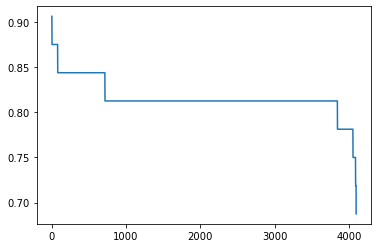

In [31]:
plt.plot(optimization_results_recall['test_recall'])
plt.show()

In [40]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

2/2 [==============================] - 0s 2ms/step


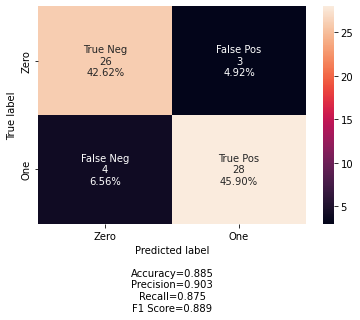

In [41]:
preds = all_models[2109].predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
cf_matrix = confusion_matrix(y_test, prediction_classes)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories)

In [42]:
highest_accuracy = all_models[2109]
print(highest_accuracy)

In [43]:
highest_accuracy_history = highest_accuracy.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, verbose=0)
print(optimize([highest_accuracy], X_test=X_test_scaled, y_test=y_test))
print(highest_accuracy_history.history.keys())

2/2 [==============================] - 0s 1000us/step
                model_name  test_accuracy  test_precision  test_recall  \
0  dense32_dense48_dense32       0.868852             0.9      0.84375   

    test_f1  
0  0.870968  
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


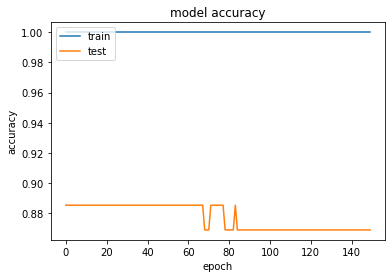

In [44]:
plt.plot(highest_accuracy_history.history['accuracy'])
plt.plot(highest_accuracy_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

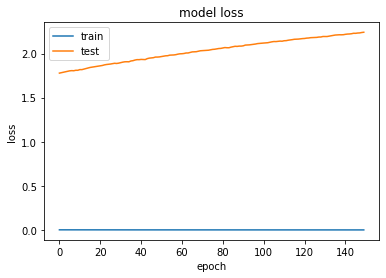

In [45]:
plt.plot(highest_accuracy_history.history['loss'])
plt.plot(highest_accuracy_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()